# Heart Failure Clinical Records

Project by: Rushil Matta

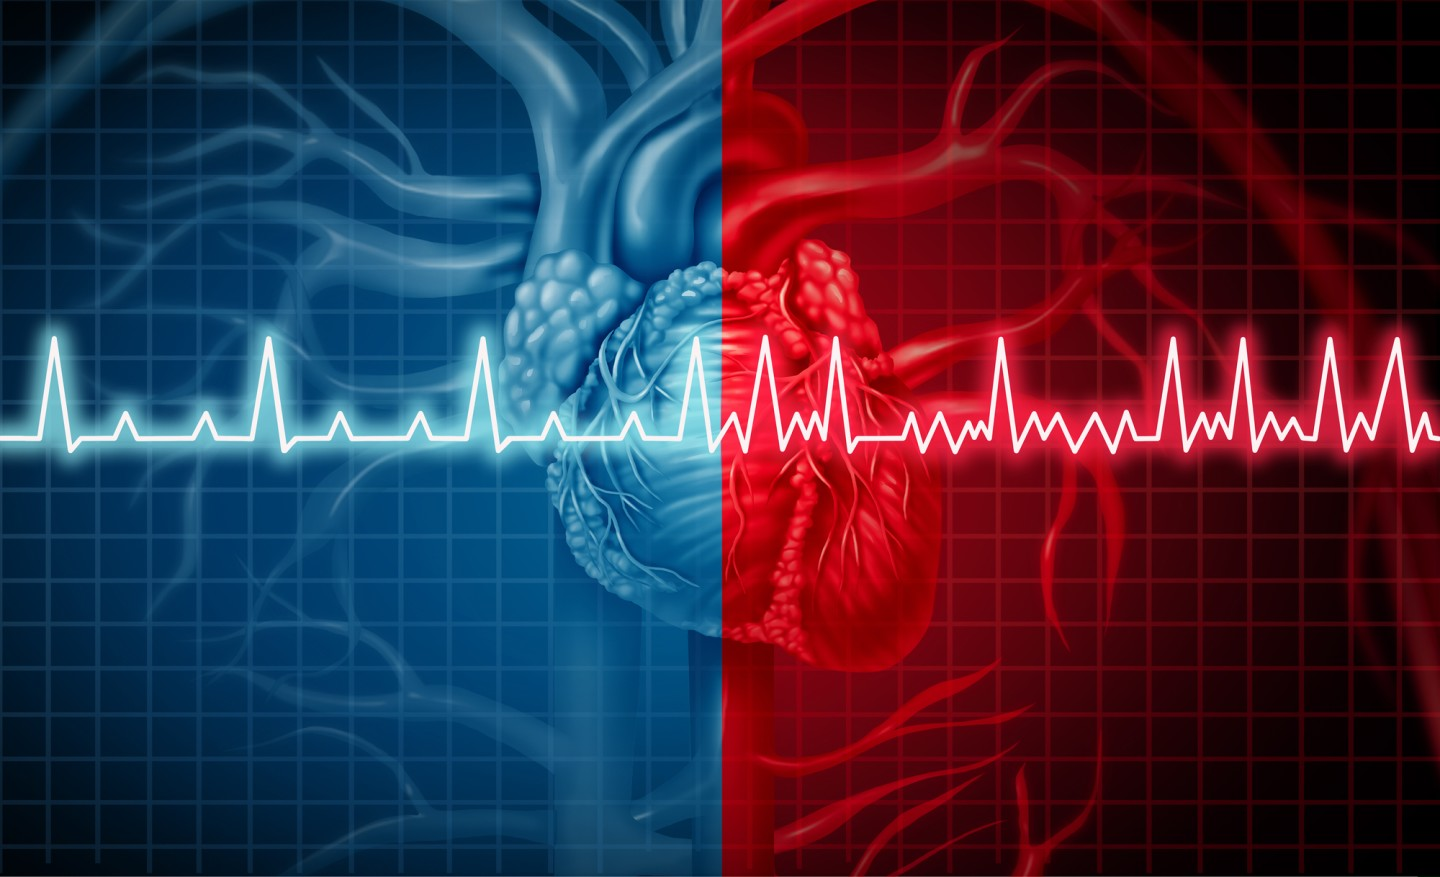

# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [5]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


# About the Data

In [7]:
df.shape

(299, 13)

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


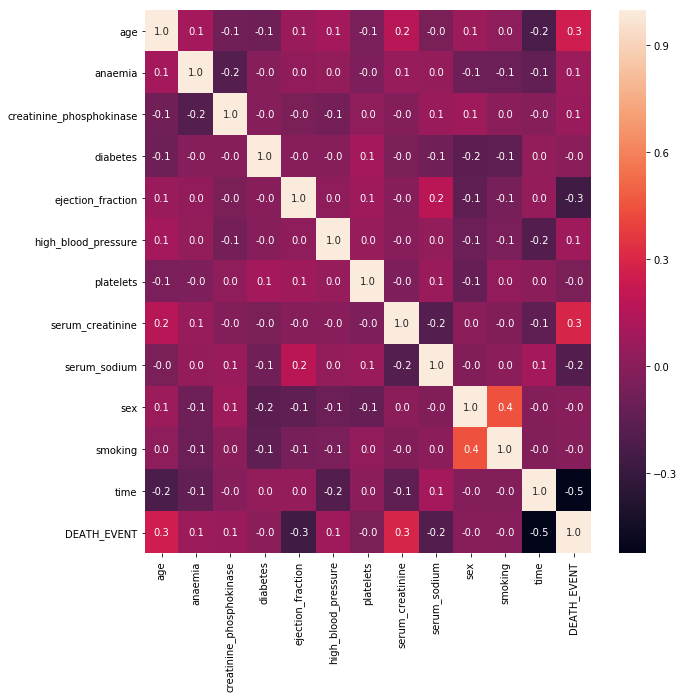

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

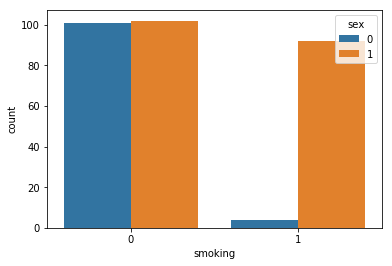

In [10]:
sns.countplot(x='smoking',hue='sex',data=df)

In [11]:
minage=min(df.age)
maxage=max(df.age)
meanage=df.age.mean()
print('Min Age :',minage)
print('Max Age :',maxage)

young=df[(df.age>=40)&(df.age<55)]
middle=df[(df.age>=55)&(df.age<65)]
old=df[(df.age>=65)]
print('Young : ',len(young))
print('Middle : ',len(middle))
print('Old : ',len(old))

Min Age : 40.0
Max Age : 95.0
Young :  95
Middle :  89
Old :  115


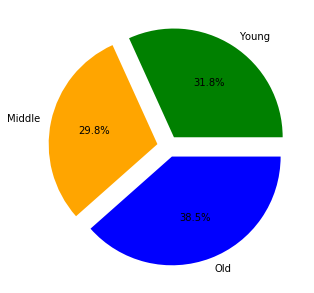

In [12]:
colors = ['green','orange','blue']
explode = [0.1,0.1,0.1]
plt.figure(figsize = (5,5))
plt.pie([len(young),len(middle),len(old)],labels=['Young','Middle','Old'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.show()

In [13]:
young_index=df[(df.age>=40)&(df.age<55)].index
middle_index=df[(df.age>=55)&(df.age<65)].index
old_index=df[(df.age>=65)].index

In [14]:
for index in old_index:
    df.loc[index,'AgeRange']='old'
    
for index in middle_index:
    df.loc[index,'AgeRange']='middle'

for index in young_index:
    df.loc[index,'AgeRange']='young'

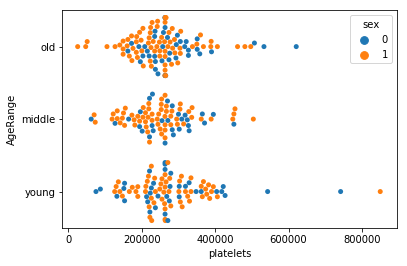

In [15]:
sns.swarmplot(x="platelets", y="AgeRange",hue='sex', data=df)
plt.show()

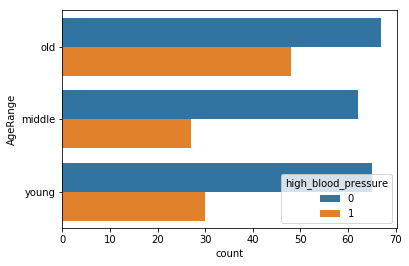

In [16]:
sns.countplot(y="AgeRange", hue="high_blood_pressure", data=df)

# Clustering techniques:

# 1> K-means clustering

# Using Elbow curve method-

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = df.iloc[:, [0,6]].values

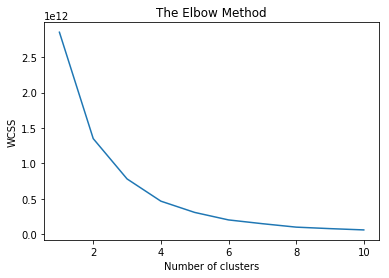

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From the above graph we can see that the bends are at the values k=2,4. 

# Using silhouette score method-

In [22]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

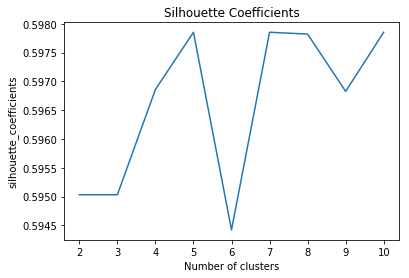

In [50]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

From the above graph we can see that the peaks are at the values k=5,7,8. 

So we compare the performance measures for all these values of k and then find the optimal number of clusters for our dataset. 

# Performance measures

In [23]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

from sklearn.metrics import davies_bouldin_score
labels=kmeans.labels_
print("DB index:",davies_bouldin_score(X,labels))

kmeans.inertia_ value :  1350400317309.0522
silhoutte value :  0.5832514681487249
DB index: 0.6313354936897926


C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

from sklearn.metrics import davies_bouldin_score
labels=kmeans.labels_
print("DB index:",davies_bouldin_score(X,labels))

kmeans.inertia_ value :  472405696148.0401
silhoutte value :  0.5563332293473666
DB index: 0.48847603875729667


C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [51]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

from sklearn.metrics import davies_bouldin_score
labels=kmeans.labels_
print("DB index:",davies_bouldin_score(X,labels))

kmeans.inertia_ value :  309481781813.3434
silhoutte value :  0.5354003698337965
DB index: 0.505315030543108


C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [52]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

from sklearn.metrics import davies_bouldin_score
labels=kmeans.labels_
print("DB index:",davies_bouldin_score(X,labels))

kmeans.inertia_ value :  153967951986.45868
silhoutte value :  0.5630619023084659
DB index: 0.4431544539419604


C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [53]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("kmeans.inertia_ value : ",kmeans.inertia_)

kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print('silhoutte value : ',kmeans_silhouette)

from sklearn.metrics import davies_bouldin_score
labels=kmeans.labels_
print("DB index:",davies_bouldin_score(X,labels))

kmeans.inertia_ value :  102343651570.81177
silhoutte value :  0.5967506088566819
DB index: 0.4282582022013565


C:\Users\Nishtha\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


On comparing the DB index, silhouette score and kmeans inertia values for all the values of k , we can see that the optimal number of clusters for our dataset are 8.

Below is the graph of the optimal clusters formed in our dataset. (As per silhouette score method)

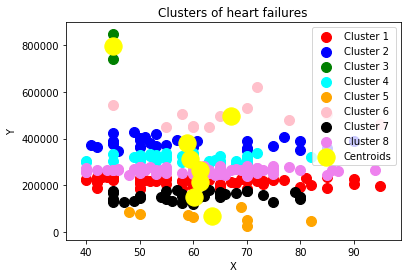

In [54]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5') 
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6') 
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'black', label = 'Cluster 7') 
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'violet', label = 'Cluster 8') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of heart failures')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 2> Hierarchial clustering:

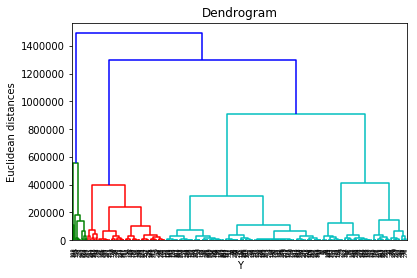

In [30]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Y')
plt.ylabel('Euclidean distances')
plt.show()

# Single linkage

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

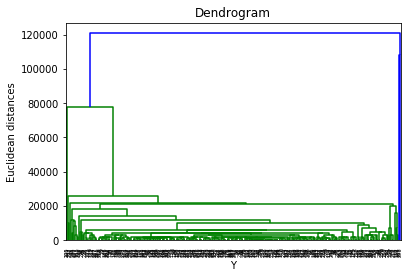

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Y')
plt.ylabel('Euclidean distances')
plt.show()

# Average linkage

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

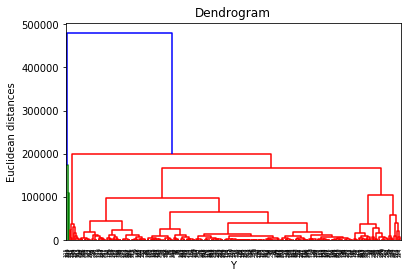

In [32]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Y')
plt.ylabel('Euclidean distances')
plt.show()

# Thank You